In [79]:
# Import necessary packages.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
# Load everything into dataframes
cols = ['user', 'movie', 'raw_ratings']
data   = pd.read_csv('./data/data.txt', sep='\t', names=cols, encoding='latin-1')
train  = pd.read_csv('./data/train.txt', sep='\t', names=cols, encoding='latin-1')
test   = pd.read_csv('./data/test.txt', sep='\t', names=cols, encoding='latin-1')

In [81]:
# Use off-the-shelf Surprise SVD
from surprise import SVD, accuracy
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset

In [180]:
# Use default dataset from scikit
default_data = Dataset.load_builtin('ml-100k')

# Split into training and testing sets
train_data, test_data = train_test_split(default_data, test_size=0.1)

In [186]:
# Optimize SVD using GridSearchCV
from surprise.model_selection import GridSearchCV

params = {'n_epochs': [10, 12, 15], 'lr_all': [0.002, 0.003, 0.004, 0.005, 0.006],
              'reg_all': [0.4, 0.5, 0.6]}

gs = GridSearchCV(SVD, params, measures=['rmse', 'mae'], cv=3)

gs.fit(default_data)

# Get best rmse
print(gs.best_score['rmse'])

# Get best parameters
print(gs.best_params['rmse'])

0.9603972171624359
{'n_epochs': 15, 'lr_all': 0.006, 'reg_all': 0.4}


In [419]:
# Train SVD using optimal parameters
svd = SVD(**gs.best_params['rmse'])
svd.fit(train_data)

# Generate predictions on test set
predictions = svd.test(test_data)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9646


0.9645756854568105

In [420]:
# Create visualization
U = svd.pu
V = svd.qi

In [466]:
U_mc = np.transpose(U) - np.transpose(np.array([np.mean(np.transpose(U), axis=1)]))
V_mc = np.transpose(V) - np.transpose(np.array([np.mean(np.transpose(V), axis=1)]))

In [465]:
# Compute loss
num_entries = len(test_data)
error = 0 #0.1/2*((np.linalg.norm(U))**2 + (np.linalg.norm(V))**2) 
for entry in range(num_entries):
    i = int(test_data[entry][0])
    j = int(test_data[entry][1])
    Yij = test_data[entry][2]
    
    U_row = U[i-1, :]
    V_row = V[j-1, :]
    error  =  error + 1/2*(Yij - np.dot(U_row,V_row))**2
    
print(error/len(test_data))

6.901183351108297


In [415]:
# Compute SVD of U and V
A_U, S, B = np.linalg.svd(U_mc)
A_V, S, B = np.linalg.svd(V_mc)

# Calculate U tilde and V tilde.
U_tilde = np.dot(np.transpose(A_U[:, 0:2]), U_mc)
V_tilde = np.dot(np.transpose(A_V[:, 0:2]), V_mc)

In [416]:
movies = pd.read_csv('./data/movies.txt', sep="\t", names=["id", "title", \
                    "unknown", "action", "adventure", "animation", "childrens", \
                    "comedy", "crime", "documentary", "drama", "fantasy", 
                    "film-noir", "horror", "musical", "mystery", "romance", \
                    "sci-fi", "thriller", "war", "western"])

In [417]:
# Load all user, movie, ratings data
data   = np.loadtxt('./data/data.txt').astype(int)
n_movies = len(V_tilde[0])

# Helpers for Visualizations

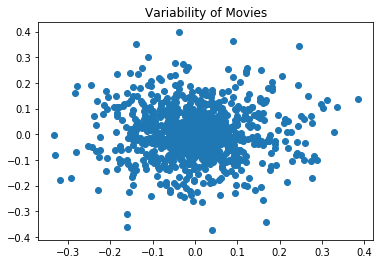

In [496]:
# All Movies
plt.title("Variability of Movies")
plt.plot(V_tilde[0], V_tilde[1], "o")
plt.show()

# Determine axis limits to be -0.4 to 0.4 for x and y axes

In [518]:
'''
    Passed a list of movie indices, idx, return the idx sorted by greatest
    number of ratings (descending order).
'''
def OrderByNumRatings (idx):
    data   = np.loadtxt('./data/data.txt').astype(int)
    mov_pop = np.zeros(len(idx))

    for i in range(len(idx)):
        pop = len(np.where(data[:, 1] == idx[i])[0])
        mov_pop[i] = pop

    order = np.argsort(mov_pop) # Get order of indices of idx
    sorted_idx = np.flipud([idx[i] for i in order])
    return sorted_idx

# Required Visualizations

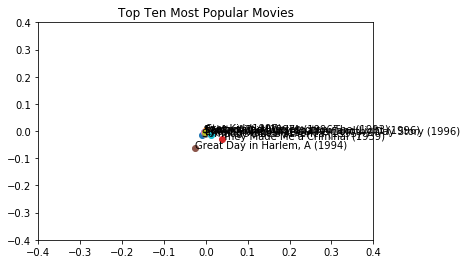

Top Ten Most Popular Movies:
['Independence Day (ID4) (1996)', 'Air Force One (1997)', 'Toy Story (1995)', 'Scream (1996)', 'English Patient, The (1996)', 'Liar Liar (1997)', 'Return of the Jedi (1983)', 'Fargo (1996)', 'Contact (1997)', 'Star Wars (1977)']


In [508]:
# Visualize Ten Most Popular Movies

# Get top ten most popular movies
data   = np.loadtxt('./data/data.txt').astype(int)
mov_pop = np.zeros(n_movies)

for i in range(n_movies):
    movie_index = i + 1
    pop = len(np.where(data[:, 1] == movie_index)[0])
    mov_pop[i] = pop

top_movie_idx = np.argsort(mov_pop)[-10:]+1
top_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in top_movie_idx]
 
# Get corresponding latent factors and plot
V_tilde_best = V_tilde[:, top_movie_idx]

l1 = [V_tilde_best[0][i] for i in range(10)]
l2 = [V_tilde_best[1][i] for i in range(10)]

for i in range(10):
    plt.plot(V_tilde_best[0][i], V_tilde_best[1][i], "o")
    plt.text(V_tilde_best[0][i], V_tilde_best[1][i], best_movies[i])

plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4) 
plt.title("Top Ten Most Popular Movies")
plt.show()

print("Top Ten Most Popular Movies:")
print(top_movies)

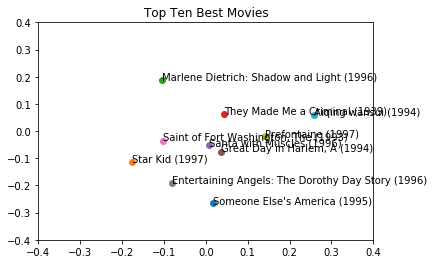

Top Ten Best Movies:
["Someone Else's America (1995)", 'Star Kid (1997)', 'Marlene Dietrich: Shadow and Light (1996) ', 'They Made Me a Criminal (1939)', 'Santa with Muscles (1996)', 'Great Day in Harlem, A (1994)', 'Saint of Fort Washington, The (1993)', 'Entertaining Angels: The Dorothy Day Story (1996)', 'Prefontaine (1997)', 'Aiqing wansui (1994)']


In [509]:
# Visualize Ten Best Movies
data   = np.loadtxt('./data/data.txt').astype(int)
mov_ratings = np.zeros(n_movies)

for i in range(1667):
    #print(i)
    movie_index = i + 1
    avg_rating = np.mean(data[np.where(data[:, 1] == movie_index)][:,2])
    mov_ratings[i] = avg_rating

#print(mov_ratings)
best_movie_idx = np.argsort(mov_ratings)[-10:]+1
best_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in best_movie_idx]

# Get corresponding latent factors and plot
V_tilde_best = V_tilde[:, best_movie_idx]

for i in range(10):
    plt.plot(V_tilde_best[0][i], V_tilde_best[1][i], "o")
    plt.text(V_tilde_best[0][i], V_tilde_best[1][i], best_movies[i])

plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4) 
plt.title("Top Ten Best Movies")
plt.show()

print("Top Ten Best Movies:")
print(best_movies)

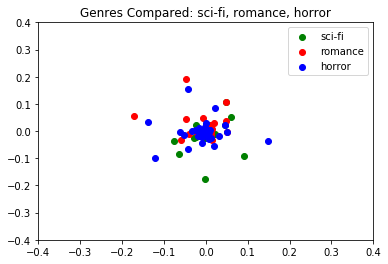

In [531]:
# Visualize Three Genres
import random

data   = np.loadtxt('./data/data.txt').astype(int)
genres = ['sci-fi', 'romance', 'horror']
colors = ['g', 'r', 'b']
plots = []

# Get random movies for each genre
for x in range(len(genres)):
    genre_movies = [np.where(movies[genres[x]] == 1)][0][0]
    
    # Select top ten rated movies
    movie_idx = OrderByNumRatings(genre_movies)[:50]
    movie_titles = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in movie_idx]

    # Get corresponding latent factors and plot
    V_tilde_genre = V_tilde[:, movie_idx]

    l1 = []
    l2 = []
    for i in range(len(movie_idx)):
        l1.append(V_tilde_genre[0][i])
        l2.append(V_tilde_genre[1][i])
    plots.append(plt.scatter(l1, l2, color=colors[x], label=genre))

plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.title("Genres Compared: sci-fi, romance, horror")
plt.legend(genres)
plt.show()

# Visualizations for Fun

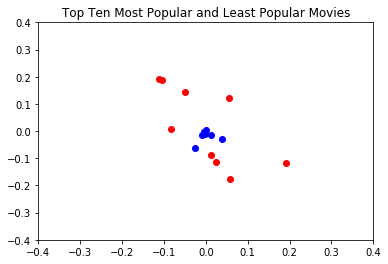

Top Ten Most Popular Movies:
['Independence Day (ID4) (1996)', 'Air Force One (1997)', 'Toy Story (1995)', 'Scream (1996)', 'English Patient, The (1996)', 'Liar Liar (1997)', 'Return of the Jedi (1983)', 'Fargo (1996)', 'Contact (1997)', 'Star Wars (1977)']
Top Ten Least Popular Movies:
['Vermont Is For Lovers (1992)', 'Careful (1992)', 'Man from Down Under, The (1943)', 'Daens (1992)', 'To Cross the Rubicon (1991)', 'Promise, The (Versprechen, Das) (1994)', 'Tigrero: A Film That Was Never Made (1994)', 'Marlene Dietrich: Shadow and Light (1996) ', 'Big Bang Theory, The (1994)']


In [540]:
# Visualize Ten Most Popular and Ten Least Popular Movies

# Get top ten most popular movies
data   = np.loadtxt('./data/data.txt').astype(int)
mov_pop = np.zeros(n_movies)

for i in range(n_movies):
    movie_index = i + 1
    pop = len(np.where(data[:, 1] == movie_index)[0])
    mov_pop[i] = pop

top_movie_idx = np.argsort(mov_pop)[-10:]+1
top_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in top_movie_idx]

bot_movie_idx = np.argsort(mov_pop)[1:10]+1
bot_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in bot_movie_idx]
 
# Get corresponding latent factors and plot
V_tilde_best = V_tilde[:, top_movie_idx]
V_tilde_worst = V_tilde[:, bot_movie_idx]

l1 = [V_tilde_best[0][i] for i in range(len(top_movie_idx))]
l2 = [V_tilde_best[1][i] for i in range(len(top_movie_idx))]

for i in range(len(l1)):
    plt.plot(V_tilde_best[0][i], V_tilde_best[1][i], "bo")
    #plt.text(V_tilde_best[0][i], V_tilde_best[1][i], best_movies[i])
    
l1 = [V_tilde_worst[0][i] for i in range(len(bot_movie_idx))]
l2 = [V_tilde_worst[1][i] for i in range(len(bot_movie_idx))]

for i in range(len(l1)):
    plt.plot(V_tilde_worst[0][i], V_tilde_worst[1][i], "ro")
    #plt.text(V_tilde_worst[0][i], V_tilde_worst[1][i], best_movies[i])

plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4) 
plt.title("Top Ten Most Popular and Least Popular Movies")
plt.show()

print("Top Ten Most Popular Movies:")
print(top_movies)
print("Top Ten Least Popular Movies:")
print(bot_movies)

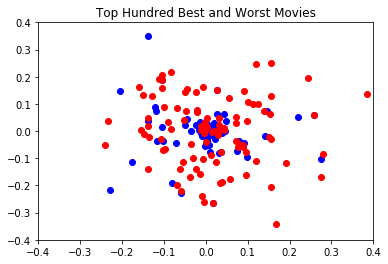

'\nprint("Top Ten Best Movies:")\nprint(best_movies)\nprint("Top Ten Worst Movies:")\nprint(worst_movies)\n'

In [606]:
# Visualize Ten Best and Worst Movies
data   = np.loadtxt('./data/data.txt').astype(int)
mov_ratings = np.zeros(n_movies)

for i in range(1667):
    movie_index = i + 1
    avg_rating = np.mean(data[np.where(data[:, 1] == movie_index)][:,2])
    mov_ratings[i] = avg_rating

#print(mov_ratings)
best_movie_idx = np.argsort(mov_ratings)[-100:]+1
worst_movie_idx = np.argsort(mov_pop)[1:100]+1
best_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in best_movie_idx]
worst_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in worst_movie_idx]

# Get corresponding latent factors and plot
V_tilde_best = V_tilde[:, best_movie_idx]
V_tilde_worst = V_tilde[:, worst_movie_idx]

for i in range(len(best_movie_idx)):
    plt.plot(V_tilde_best[0][i], V_tilde_best[1][i], "bo")
for i in range(len(worst_movie_idx)):
    plt.plot(V_tilde_worst[0][i], V_tilde_worst[1][i], "ro")
    #plt.text(V_tilde_best[0][i], V_tilde_best[1][i], best_movies[i])

plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4) 
plt.title("Top Hundred Best and Worst Movies")
plt.show()

'''
print("Top Ten Best Movies:")
print(best_movies)
print("Top Ten Worst Movies:")
print(worst_movies)
'''

In [582]:
words=['girl']
lst_idx = np.where(movies['title'].str.contains(words[0]))
print(lst_idx)
movie_idx = movies['id'][lst_idx[0]]
print([movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in movie_idx])

(array([ 374, 1486]),)
['Showgirls (1995)', 'Even Cowgirls Get the Blues (1993)']


boy :
['Bad Boys (1995)', 'Boys on the Side (1995)', 'Tommy Boy (1995)', 'Boys Life (1995)', 'Cabin Boy (1994)', 'Newton Boys, The (1998)', 'Cowboy Way, The (1994)', 'Boys of St. Vincent, The (1993)', 'Boys (1996)', 'Boys in Venice (1996)', "Boy's Life 2 (1997)", 'Boys, Les (1997)', 'Jerky Boys, The (1994)', 'Butcher Boy, The (1998)', 'Butcher Boy, The (1998)']
15
man :
['Dead Man Walking (1995)', 'Batman Forever (1995)', 'Eat Drink Man Woman (1994)', 'True Romance (1993)', 'Horseman on the Roof, The (Hussard sur le toit, Le) (1995)', 'Wallace & Gromit: The Best of Aardman Animation (1996)', 'Lawnmower Man, The (1992)', 'Manon of the Spring (Manon des sources) (1986)', 'Batman Returns (1992)', 'Austin Powers: International Man of Mystery (1997)', 'Batman & Robin (1997)', 'Man Who Knew Too Little, The (1997)', 'Man Without a Face, The (1993)', 'Batman (1989)', 'Roman Holiday (1953)', 'Thin Man, The (1934)', 'Third Man, The (1949)', 'Manhattan (1979)', 'Man Who Would Be King, The (1975)'

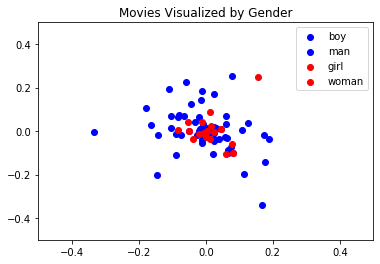

In [646]:
# Visualize series of movies by name
data   = np.loadtxt('./data/data.txt').astype(int)
words = ['boy', 'man', 'girl', 'woman']
colors = ['b', 'b', 'r', 'r', ]
plots = []

fig = plt.figure()

# Get random movies for each genre
for x in range(len(words)):
    lst_idx = np.where(movies['title'].str.lower().str.contains(words[x]))
    movie_idx = movies['id'][lst_idx[0]]
    movie_titles = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in movie_idx]

    print(words[x], ":")
    print(movie_titles)
    print(len(movie_titles))
    
    # Get corresponding latent factors and plot
    V_tilde_genre = V_tilde[:, movie_idx]

    l1 = []
    l2 = []
    for i in range(len(movie_titles)):
        l1.append(V_tilde_genre[0][i])
        l2.append(V_tilde_genre[1][i])
        #plt.text(l1[i], l2[i], movie_titles[i])
    plots.append(plt.scatter(l1, l2, color=colors[x], label=genre))
 
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.title("Movies Visualized by Gender")
plt.legend(words)
plt.show()

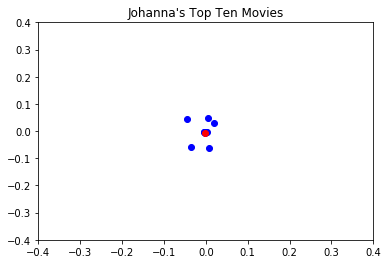

In [546]:
# Visualize Any Ten Movies (Johanna's favorites)

# Get top ten most popular movies
mov_pop = np.zeros(n_movies)

for i in range(n_movies):
    movie_index = i + 1
    pop = len(np.where(data[:, 1] == movie_index)[0])
    mov_pop[i] = pop
    
movie_titles = ['Forrest Gump (1994)', 'Lion King, The (1994)', 'Aladdin (1992)',
               'Breakfast at Tiffany\'s (1961)', 'The Sound of Music (1965)',
               'Schindler\'s List (1993)', 'Mary Poppins (1964)', 
               'Alice in Wonderland (1951)', 'A Little Princess (1995)', 'Casablanca (1942)' ]

unfavorite_titles = ['Braveheart (1995)']

movie_idx = [69, 71, 95, 131, 143, 318, 419, 420, 1063, 483]
unfavorite_idx = [22]

# Get corresponding latent factors and plot
V_tilde_rand = V_tilde[:, movie_idx]

for i in range(len(movie_idx)):
    plt.plot(V_tilde_rand[0][i], V_tilde_rand[1][i], "bo")
for i in range(len(unfavorite_idx)):
    plt.plot(V_tilde_rand[0][i], V_tilde_rand[1][i], "ro")
    
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4) 
plt.title("Johanna's Top Ten Movies")
plt.show()